# TP récapitulatif


## Données

Ce jeu de données contient des informations sur des menus McDonald. Vous trouverez le détail des variables sur [cette page](https://www.kaggle.com/mcdonalds/nutrition-facts). Vous devez l'importer comme ci-dessous.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale

In [2]:
menus = pandas.read_csv("https://fxjollois.github.io/cours-2022-2023/lp-iot--python-ds/menus_mcdonald.csv")
menus.head()

,Unnamed: 0,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,31,10,4,17,3,17,10,0,25,15
1,1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,30,10,4,17,3,18,6,0,25,8
2,2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,29,10,4,17,2,14,8,0,25,10
3,3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,30,10,4,17,2,21,15,0,30,15
4,4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,30,10,4,17,2,21,6,0,25,10


## A faire

Sous la forme d'un notebook le plus propre et le mieux organisé possible, vous devez :

- Décrire les données (distribution des variables, données aberrantes)
- Réperer les variables sur lesquelles se concentrer (il y en a plusieurs à supprimer)
- Réaliser une ACP sur les données
    - en justifiant s'il faut ou non standardiser les variables au préalable
- Représenter les menus sur le plan factoriel
    - commenter celui-ci
- Décrire les axes en se basant sur le cercle des corrélations des variables
- Déterminer un nombre de classes adapté à ce jeu de données
- Trouver la partition des menus, avec le nombre de classes optimal obtenu ci-dessus
- Décrire les classes et les comparer entre elles
- Efectuer toutes les représentations qui vous semblent utiles pour décrire vos résultats et accompagner votre conclusion


## Description des variables

In [3]:
menus.describe()

,Unnamed: 0,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,129.500000,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,75.199734,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,129.500000,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,194.250000,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,259.000000,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


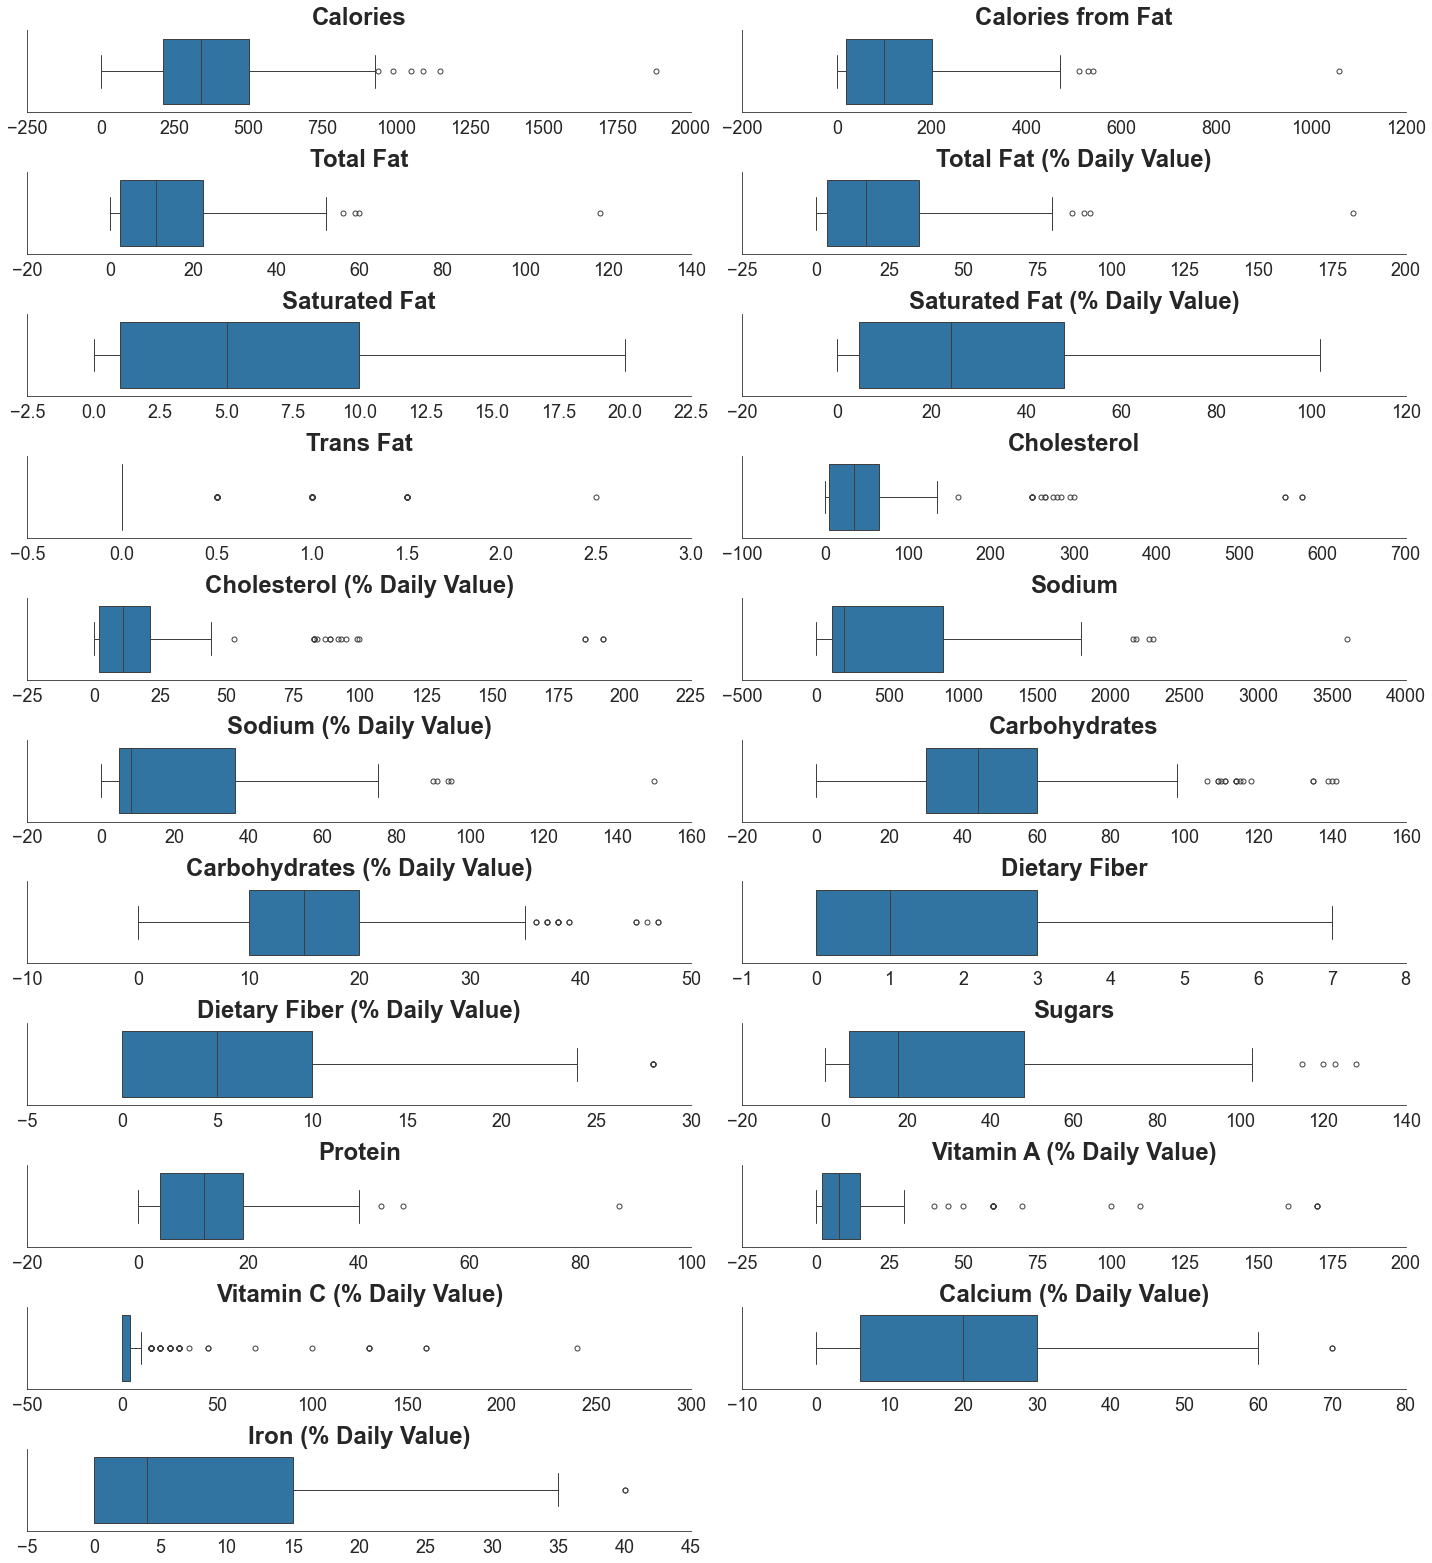

In [4]:
g = seaborn.catplot(x = "value", 
                    data = menus.drop(columns = ["Unnamed: 0", "Category", "Serving Size"]).melt(id_vars="Item"), 
                kind = "box", height = 2, aspect = 5,
                col = "variable", col_wrap = 2, sharex = False)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "")
plt.show()

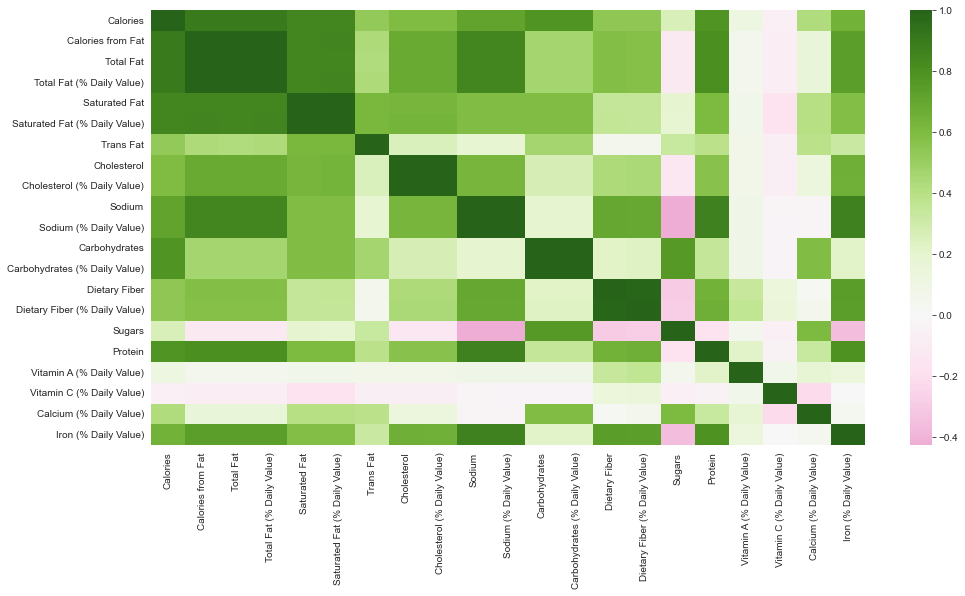

In [5]:
plt.figure(figsize = (16, 8))
seaborn.heatmap(menus.drop(columns = ["Unnamed: 0", "Category", "Serving Size", "Item"]).corr(), 
                center = 0, cmap = "PiYG")
plt.show()

> **A supprimer** :
- `Unnamed: 0` : genre d'identifiant
- `Category` : variable qualitative
- `Serving Size` : variable sans intérêt
- `Item` : nom de l'entité
- `Calories from Fat` et `Total Fat (% Daily Value)` : information identique à `Total Fat`
- `Saturated Fat (% Daily Value)` : information identique à `Saturated Fat`
- `Cholesterol (% Daily Value)` : information identique à `Cholesterol`
- `Sodium (% Daily Value)` : information identique à `Sodium`
- `Carbohydrates (% Daily Value)` : information identique à `Carbohydrates`
- `Dietary Fiber (% Daily Value)` : information identique à `Dietary Fiber`
- `Trans Fat` : Peu de valeurs différents (et beaucoup de 0)
- `Vitamin C (% Daily Value)` : Beaucoup de 0

In [6]:
menus_bis = menus.drop(columns = ["Unnamed: 0", "Category", "Serving Size", "Item", 
                                  "Calories from Fat", "Total Fat (% Daily Value)",
                                  "Saturated Fat (% Daily Value)",
                                  "Cholesterol (% Daily Value)",
                                  "Sodium (% Daily Value)",
                                  "Carbohydrates (% Daily Value)",
                                  "Dietary Fiber (% Daily Value)",
                                  "Trans Fat", 
                                  "Vitamin C (% Daily Value)"])
menus_bis.head()

,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,13.0,5.0,260,750,31,4,3,17,10,25,15
1,250,8.0,3.0,25,770,30,4,3,18,6,25,8
2,370,23.0,8.0,45,780,29,4,2,14,8,25,10
3,450,28.0,10.0,285,860,30,4,2,21,15,30,15
4,400,23.0,8.0,50,880,30,4,2,21,6,25,10


## Réalisation de l'ACP

Il faut bien évidemment utiliser l'ACP sur les données centrées-réduites.

In [7]:
pca = PCA(n_components = menus_bis.shape[1])
pca.fit(scale(menus_bis))

PCA(n_components=12)

In [8]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(menus_bis.shape[1])], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,6.213683,52.0,52.0
1,Dim2,2.654816,22.0,74.0
2,Dim3,1.153127,10.0,83.0
3,Dim4,0.576621,5.0,88.0
4,Dim5,0.533581,4.0,92.0
5,Dim6,0.389878,3.0,96.0
6,Dim7,0.235885,2.0,98.0
7,Dim8,0.175784,1.0,99.0
8,Dim9,0.056258,0.0,100.0
9,Dim10,0.041322,0.0,100.0


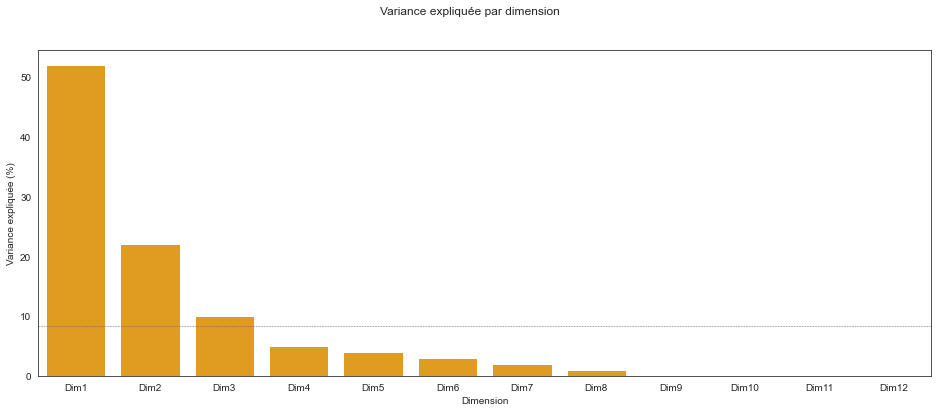

In [9]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        color = "orange",
                        data = eig)
plt.axhline(y = 100 / menus_bis.shape[1], linewidth = .5, color = "dimgray", linestyle = "--")
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [10]:
df_pca = pandas.DataFrame(pca.transform(scale(menus_bis)),
                          columns = ["Dim" + str(i+1) for i in range(menus_bis.shape[1])])
df_pca.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12
0,1.395359,-1.581487,0.215831,1.016513,0.337476,-2.061906,-0.110676,0.527600,0.018296,-0.171772,0.056257,0.023533
1,0.006968,-1.334840,0.605668,-0.985251,0.699182,-0.741938,-0.507922,0.552789,-0.139955,-0.422511,0.126430,0.047210
2,0.930173,-1.197553,0.196093,-0.482419,0.306035,-0.197952,-1.213504,0.605467,-0.129768,-0.032535,-0.187381,0.030964
3,2.663274,-1.331169,0.001863,1.465525,0.403168,-1.349042,-0.504025,0.859397,0.188260,-0.018998,-0.093930,0.013885
4,1.276797,-1.250352,0.158411,-0.631175,0.551187,-0.112388,-0.891105,0.678804,0.086260,-0.232513,-0.032588,0.036938


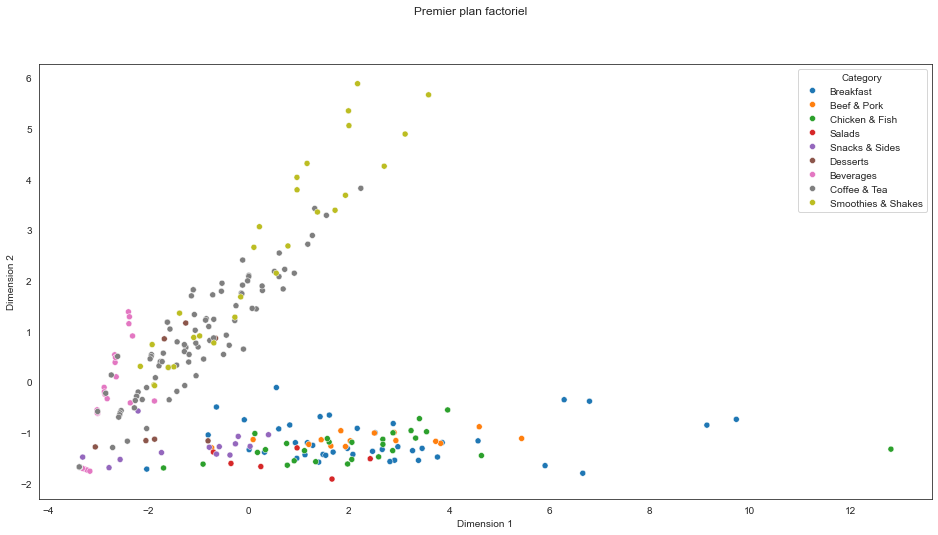

In [11]:
plt.figure(figsize = (16, 8))
g_pca = seaborn.scatterplot(
    x = "Dim1", y = "Dim2", hue = "Category", 
    data = df_pca.assign(Category = menus.Category))
g_pca.set(xlabel = "Dimension 1", ylabel = "Dimension 2")
g_pca.figure.suptitle("Premier plan factoriel")

plt.show()

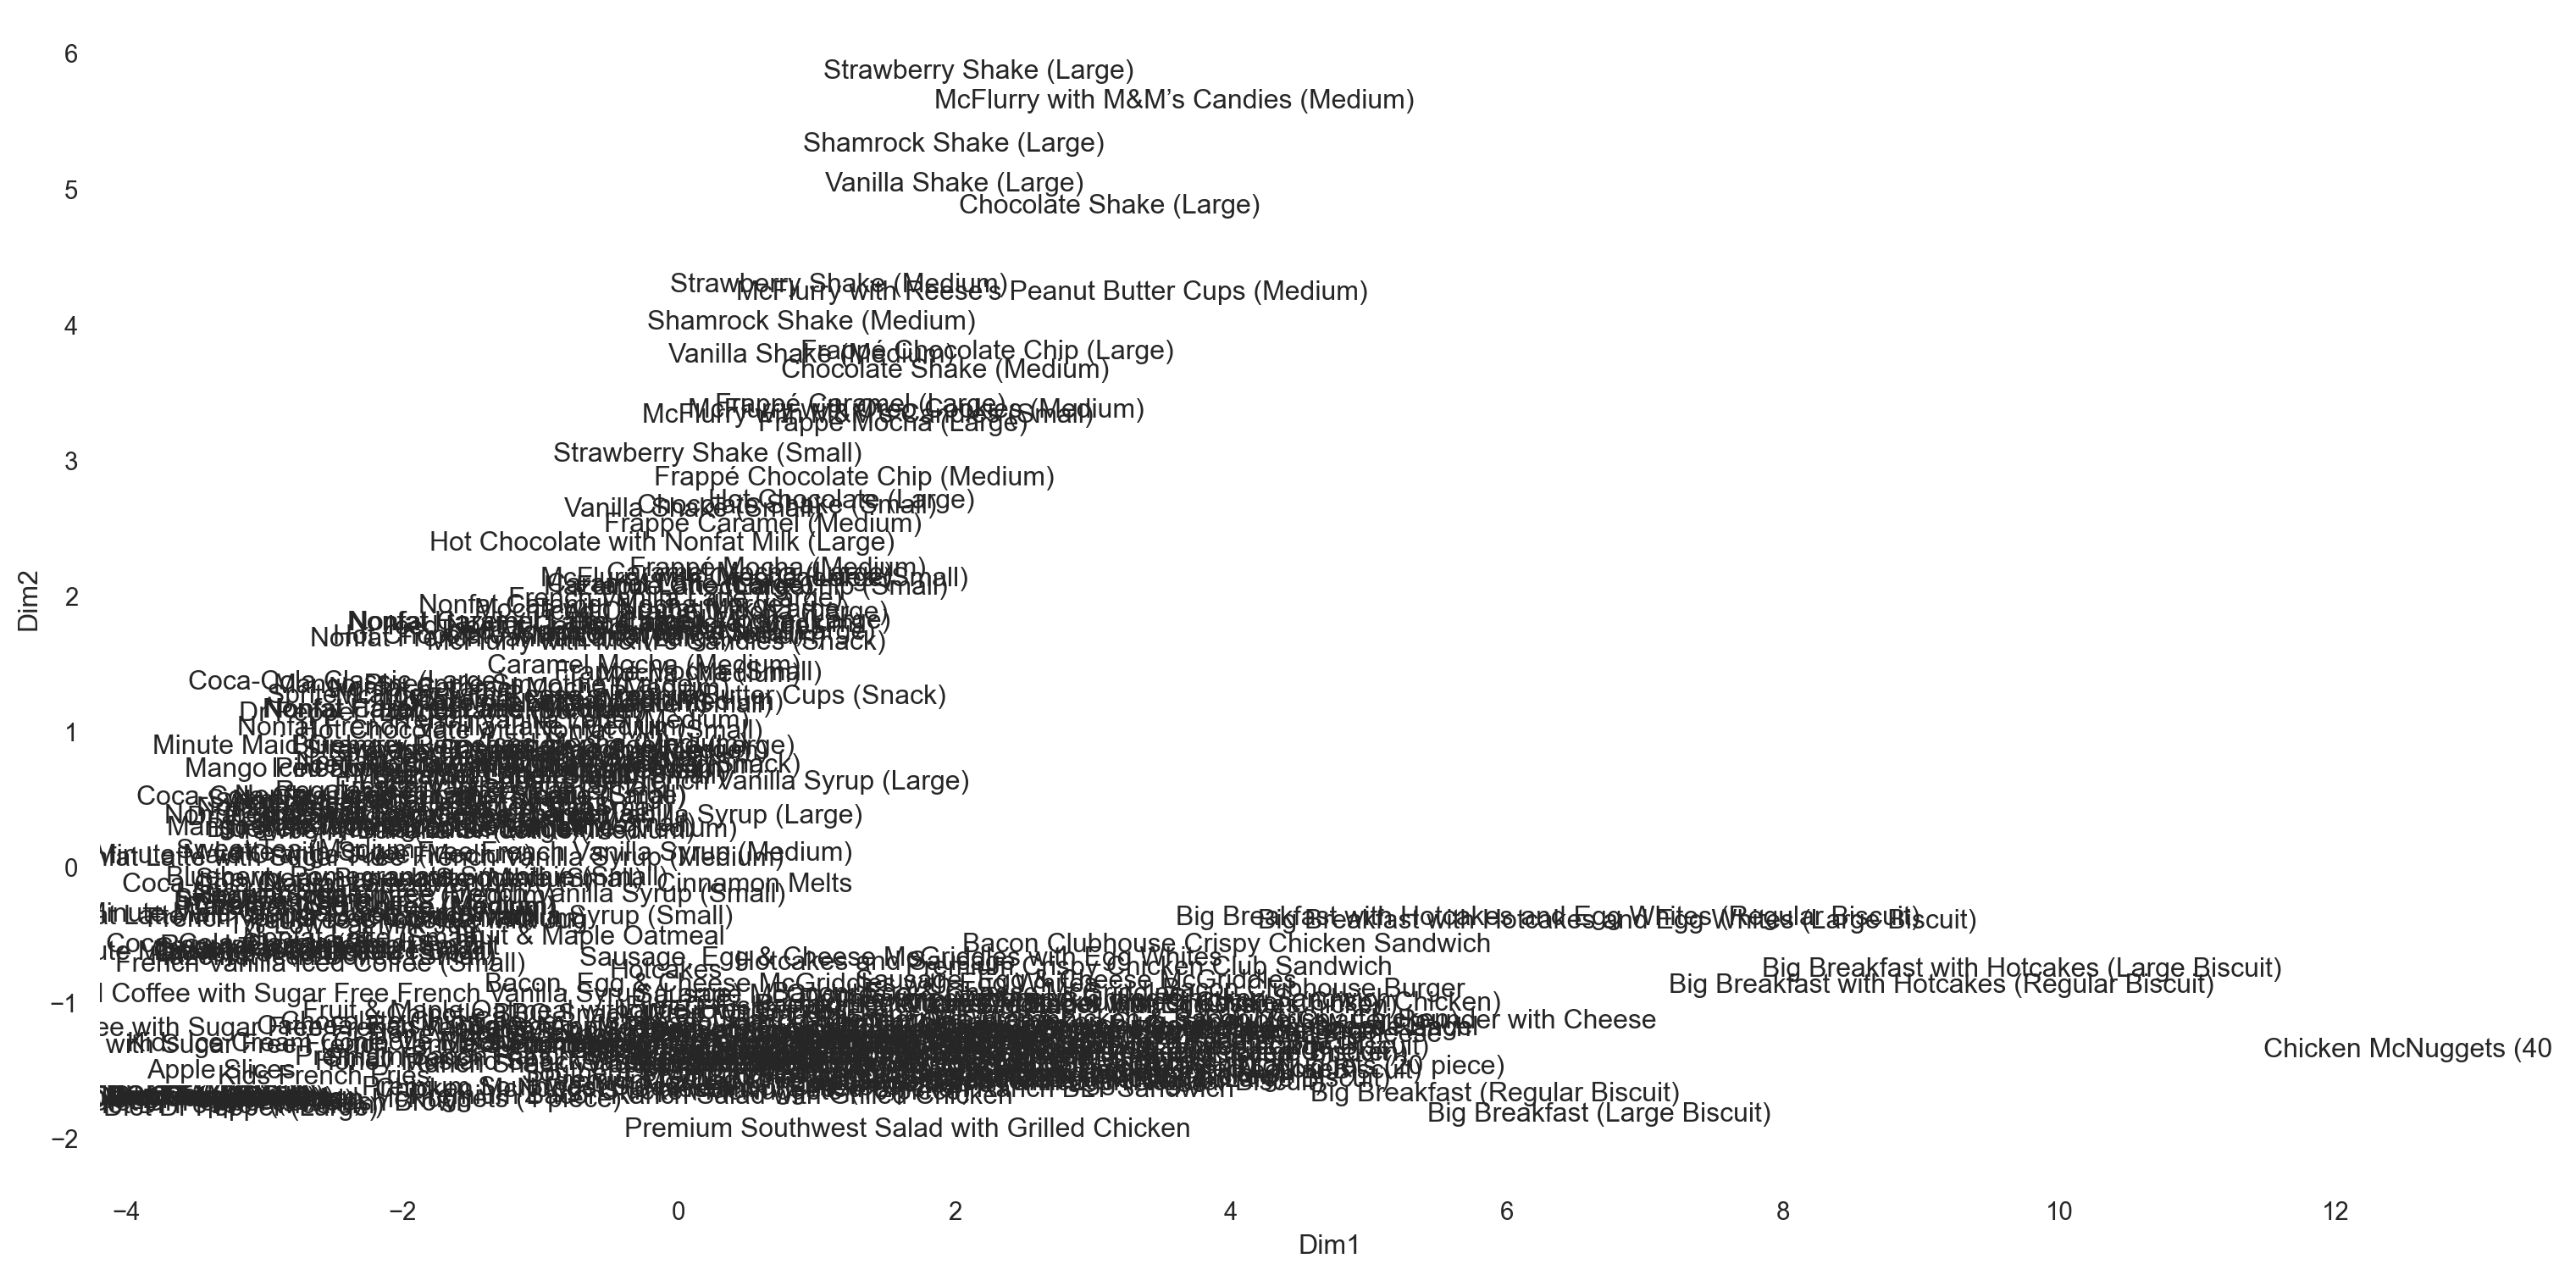

In [12]:
import seaborn.objects as so

so.Plot.config.theme["axes.facecolor"] = "white"
so.Plot(df_pca.assign(Item = menus.Item), x="Dim1", y="Dim2", text="Item") \
    .add(so.Text()) \
    .layout(size=(16, 8))


In [13]:
coordvar = pca.components_.T * numpy.sqrt(pca.explained_variance_)
coordvar_df = pandas.DataFrame(coordvar, 
                               columns=['PC'+str(i+1) for i in range(menus_bis.shape[1])], 
                               index=menus_bis.columns)

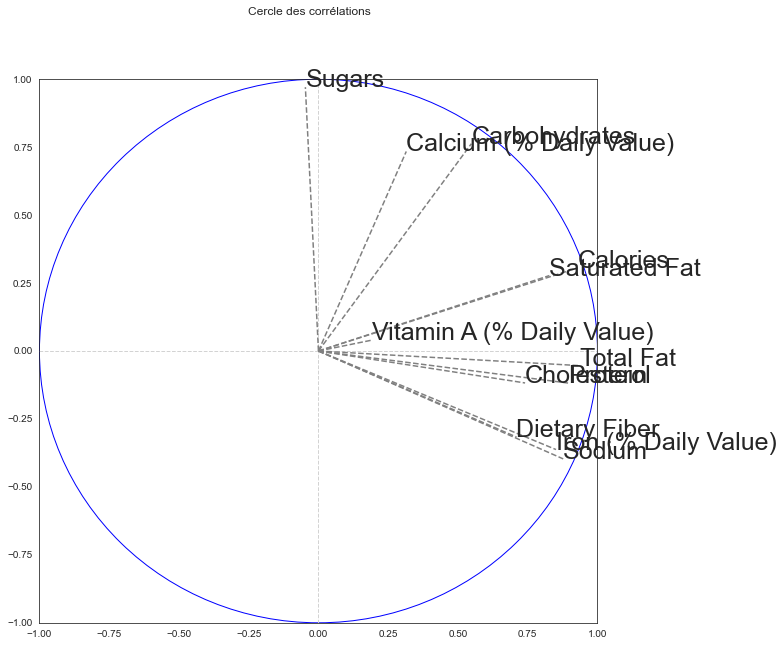

In [14]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(menus_bis.shape[1]):
    axes.text(coordvar_df["PC1"].iloc[j],
              coordvar_df["PC2"].iloc[j], 
              coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC1"].iloc[j]], 
              [0,coordvar_df["PC2"].iloc[j]], 
              color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

- Le premier axe sépare les items très riches à droite (sûrement dû à leur taille et au contenu) des items moins riches à gauche ;
- Le second axe sépare les desserts et boissons (en haut - très lié à `Sugar`) aux menus classiques (en bas).

## Réalisation d'une partition

### Avec CAH

In [15]:
hac = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
hac.fit(scale(menus_bis))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

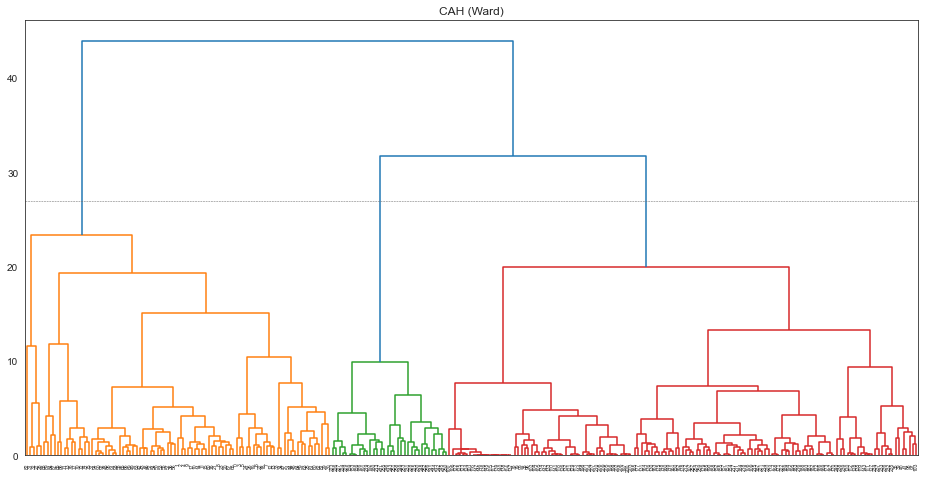

In [16]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 27, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

### Avec $k$-means

In [17]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(menus_bis))
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (menus_bis.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

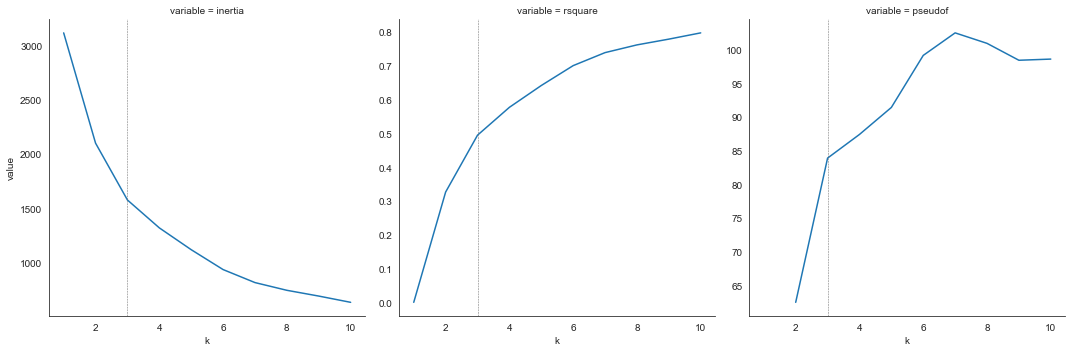

In [18]:
g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
g.map(plt.axvline, x = 3, linewidth = .5, color = "dimgray", linestyle = "--")
g.add_legend()
plt.show()

## On choisit dont 3 classes

In [19]:
kmeans = KMeans(n_clusters = 3, n_init = 50, init = "random")
kmeans.fit(menus_bis)

KMeans(init='random', n_clusters=3, n_init=50)

In [20]:
pandas.crosstab(kmeans.labels_, "Nb")

col_0,Nb
row_0,
0,6
1,176
2,78


In [21]:
pandas.crosstab(kmeans.labels_, menus.Category)

Category,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
row_0,,,,,,,,,
0,0,0,4,2,0,0,0,0,0
1,1,27,5,3,95,7,2,28,8
2,14,0,33,22,0,0,4,0,5


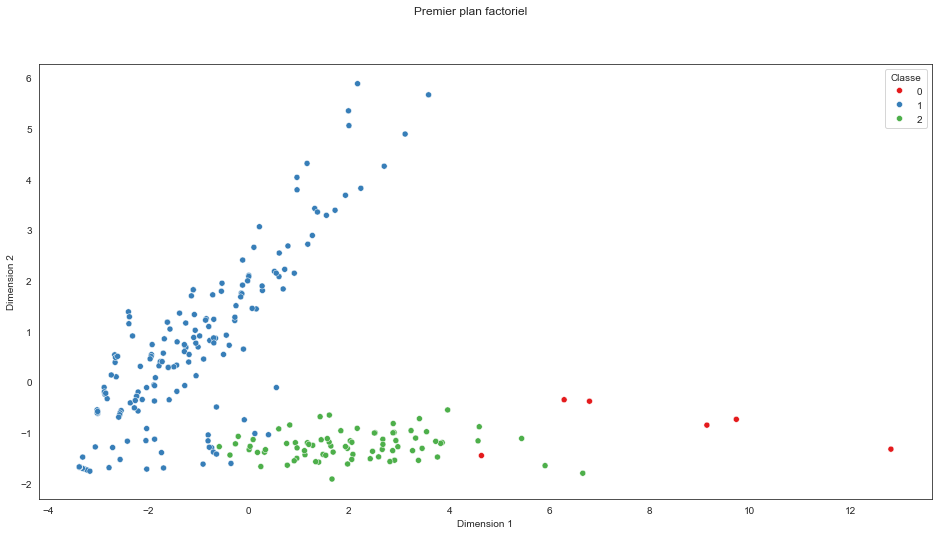

In [22]:
plt.figure(figsize = (16, 8))
g_pca = seaborn.scatterplot(
    x = "Dim1", y = "Dim2", hue = "Classe", 
    data = df_pca.assign(Classe = kmeans.labels_),
    palette = "Set1")
g_pca.set(xlabel = "Dimension 1", ylabel = "Dimension 2")
g_pca.figure.suptitle("Premier plan factoriel")

plt.show()

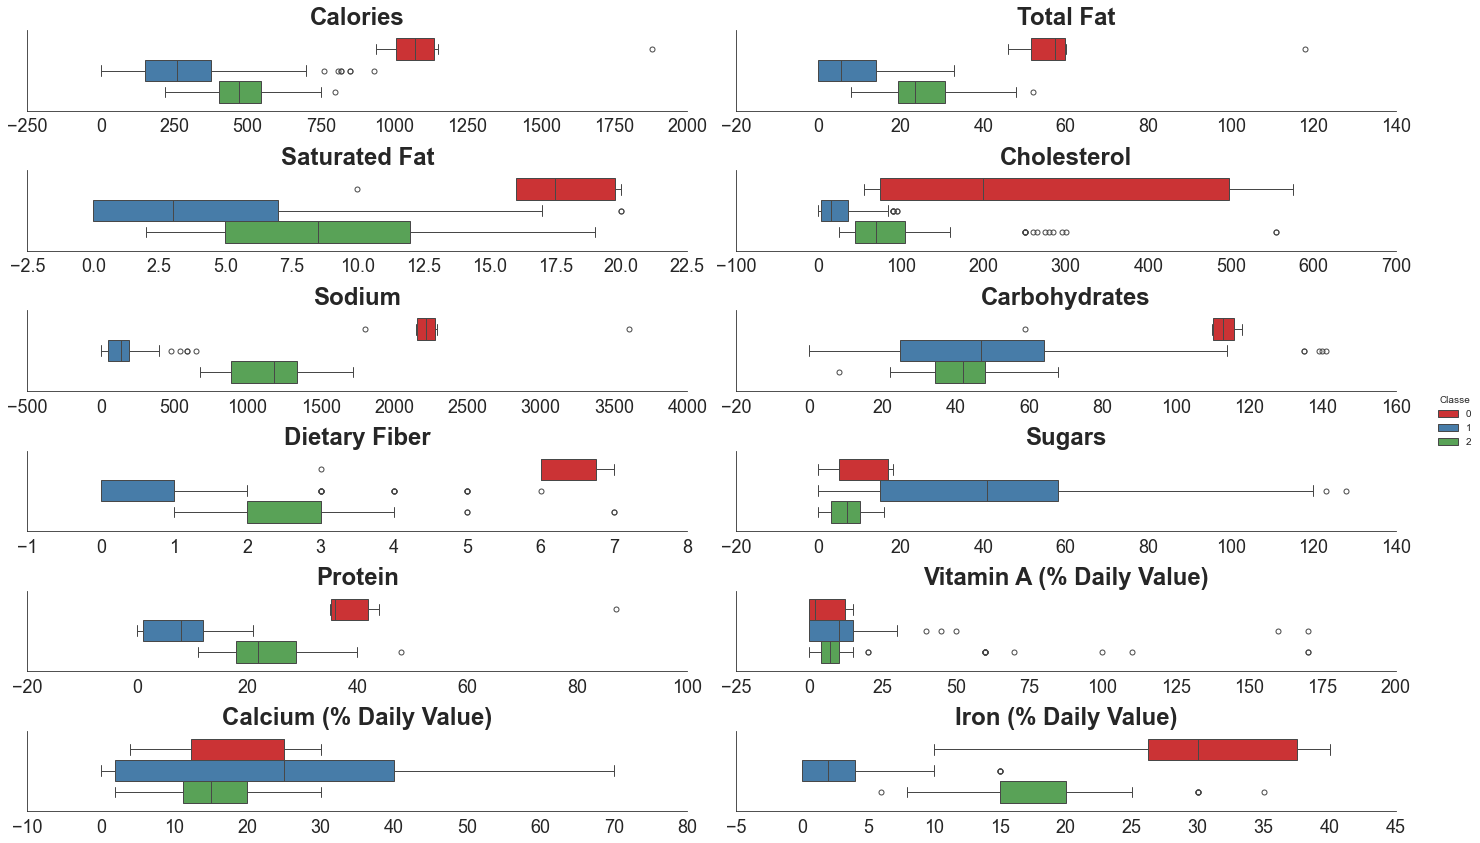

In [23]:
g = seaborn.catplot(x = "value", 
                    data = menus_bis.assign(Classe = kmeans.labels_).melt(id_vars="Classe"), 
                    kind = "box", height = 2, aspect = 5, hue = "Classe", palette = "Set1",
                    col = "variable", col_wrap = 2, sharex = False)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "")
plt.show()

- 1 classe semble regrouper les desserts et boissons
- 1 classe semble regrouper les menus plus classiques
- 1 dernière classe (très petite) regroupe les menus avec beaucoup de fibres et de carbohydrates)

In [24]:
liste_menus = menus.assign(Classe = kmeans.labels_) \
    .groupby("Classe")['Item'].apply(list).reset_index(name = 'Menus')
liste_menus

,Classe,Menus
0,0,[Big Breakfast with Hotcakes (Regular Biscuit)...
1,1,"[Hotcakes, Hash Brown, Cinnamon Melts, Fruit &..."
2,2,"[Egg McMuffin, Egg White Delight, Sausage McMu..."


In [25]:
for c in range(3):
    print(" ".join(["-"] * 20))
    print("Classe : " + str(c) + "\n")
    print(liste_menus.Menus[c])
    print("\n")

- - - - - - - - - - - - - - - - - - - -
Classe : 0

['Big Breakfast with Hotcakes (Regular Biscuit)', 'Big Breakfast with Hotcakes (Large Biscuit)', 'Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)', 'Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)', 'Chicken McNuggets (20 piece)', 'Chicken McNuggets (40 piece)']


- - - - - - - - - - - - - - - - - - - -
Classe : 1

['Hotcakes', 'Hash Brown', 'Cinnamon Melts', 'Fruit & Maple Oatmeal', 'Fruit & Maple Oatmeal without Brown Sugar', 'Hamburger', 'Chicken McNuggets (4 piece)', 'Chicken McNuggets (6 piece)', 'Filet-O-Fish', 'Premium Bacon Ranch Salad (without Chicken)', 'Premium Southwest Salad (without Chicken)', 'Honey Mustard Snack Wrap (Grilled Chicken)', 'Small French Fries', 'Medium French Fries', 'Large French Fries', 'Kids French Fries', 'Side Salad', 'Apple Slices', "Fruit 'n Yogurt Parfait", 'Baked Apple Pie', 'Chocolate Chip Cookie', 'Oatmeal Raisin Cookie', 'Kids Ice Cream Cone', 'Hot Fudge Sundae', 'Hot C

## Et avec 7 classes ?

In [26]:
kmeans7 = KMeans(n_clusters = 7, n_init = 50, init = "random")
kmeans7.fit(menus_bis)

KMeans(init='random', n_clusters=7, n_init=50)

In [27]:
pandas.crosstab(kmeans7.labels_, "Nb")

col_0,Nb
row_0,
0,80
1,22
2,5
3,35
4,30
5,61
6,27


In [28]:
pandas.crosstab(kmeans7.labels_, menus.Category)

Category,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
row_0,,,,,,,,,
0,0,4,3,1,56,4,1,9,2
1,3,0,11,8,0,0,0,0,0
2,0,0,4,1,0,0,0,0,0
3,8,0,16,11,0,0,0,0,0
4,0,0,1,0,12,0,0,16,1
5,0,23,0,0,27,3,1,3,4
6,4,0,7,6,0,0,4,0,6


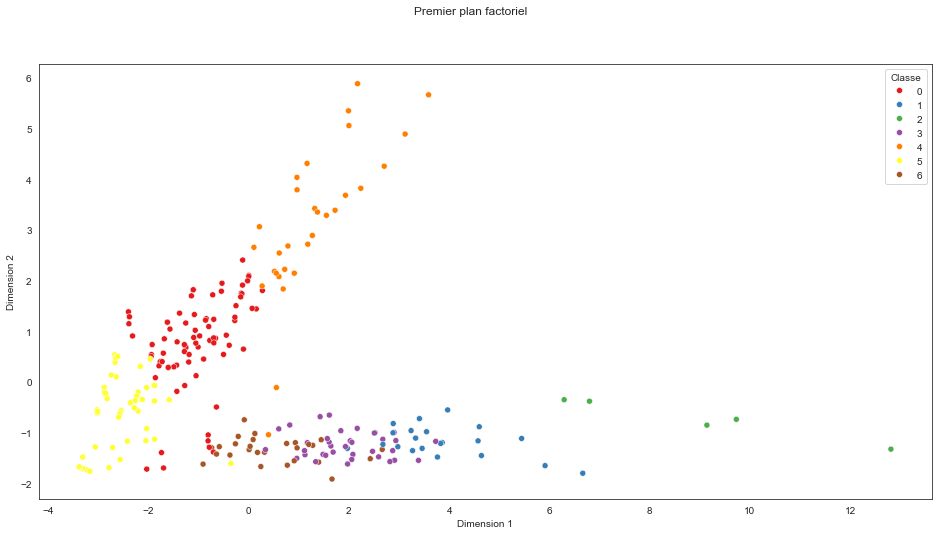

In [29]:
plt.figure(figsize = (16, 8))
g_pca = seaborn.scatterplot(
    x = "Dim1", y = "Dim2", hue = "Classe", 
    data = df_pca.assign(Classe = kmeans7.labels_),
    palette = "Set1")
g_pca.set(xlabel = "Dimension 1", ylabel = "Dimension 2")
g_pca.figure.suptitle("Premier plan factoriel")

plt.show()

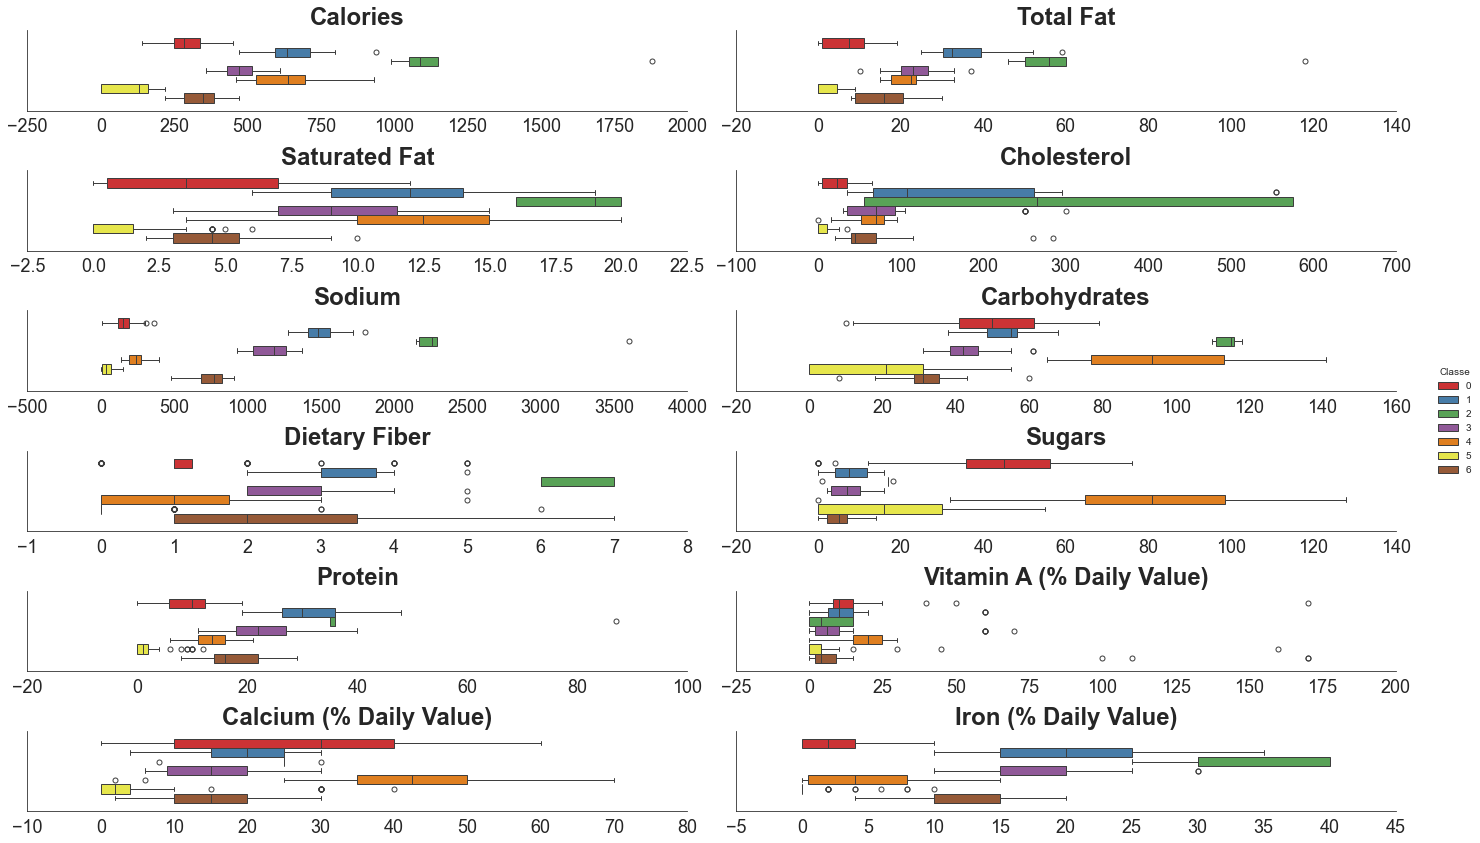

In [30]:
g = seaborn.catplot(x = "value", 
                    data = menus_bis.assign(Classe = kmeans7.labels_).melt(id_vars="Classe"), 
                    kind = "box", height = 2, aspect = 5, hue = "Classe", palette = "Set1",
                    col = "variable", col_wrap = 2, sharex = False)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "")
plt.show()

- 1 classe avec un seul élément (le gros menu à 40 nuggets)
- 1 classe avec des desserts ou des boissons très sucrés
- 1 classe avec des boissons
- 1 classe avec des salades
- 3 classes avec des menus de plus en plus riches

In [31]:
liste_menus = menus.assign(Classe = kmeans7.labels_) \
    .groupby("Classe")['Item'].apply(list).reset_index(name = 'Menus')
liste_menus

,Classe,Menus
0,0,"[Hash Brown, Fruit & Maple Oatmeal, Fruit & Ma..."
1,1,"[Bacon, Egg & Cheese Biscuit (Large Biscuit), ..."
2,2,[Big Breakfast with Hotcakes (Regular Biscuit)...
3,3,"[Steak & Egg McMuffin, Bacon, Egg & Cheese Bis..."
4,4,"[Cinnamon Melts, Large French Fries, Mocha (La..."
5,5,"[Premium Southwest Salad (without Chicken), Ki..."
6,6,"[Egg McMuffin, Egg White Delight, Sausage McMu..."


In [32]:
for c in range(7):
    print(" ".join(["-"] * 20))
    print("Classe : " + str(c) + "\n")
    print(liste_menus.Menus[c])
    print("\n")

- - - - - - - - - - - - - - - - - - - -
Classe : 0

['Hash Brown', 'Fruit & Maple Oatmeal', 'Fruit & Maple Oatmeal without Brown Sugar', 'Chicken McNuggets (4 piece)', 'Premium Bacon Ranch Salad (without Chicken)', 'Small French Fries', 'Medium French Fries', 'Baked Apple Pie', 'Hot Fudge Sundae', 'Hot Caramel Sundae', 'Strawberry Sundae', 'Coca-Cola Classic (Large)', 'Dr Pepper (Large)', 'Sprite (Large)', 'Minute Maid Orange Juice (Large)', 'Latte (Medium)', 'Latte (Large)', 'Caramel Latte (Small)', 'Caramel Latte (Medium)', 'Caramel Latte (Large)', 'Hazelnut Latte (Small)', 'Hazelnut Latte (Medium)', 'Hazelnut Latte (Large)', 'French Vanilla Latte (Small)', 'French Vanilla Latte (Medium)', 'French Vanilla Latte (Large)', 'Latte with Sugar Free French Vanilla Syrup (Small)', 'Latte with Sugar Free French Vanilla Syrup (Medium)', 'Latte with Sugar Free French Vanilla Syrup (Large)', 'Nonfat Latte (Large)', 'Nonfat Caramel Latte (Small)', 'Nonfat Caramel Latte (Medium)', 'Nonfat Caramel